In [1]:
import chiLife as xl
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('chiLife')

C:\Program Files\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
omp = xl.fetch('1omp').select_atoms('protein')
L135R1 = xl.SpinLabel('R1A', 135, omp)
K277R1 = xl.SpinLabel('R1A', 277, omp)

traj, dE = xl.repack(omp, L135R1, K277R1, repetitions=5000, temp=298, off_rotamer=True)

100%|██████████████████████████████████████████████████████████████████████████████| 5000/5000 [01:07<00:00, 74.19it/s]


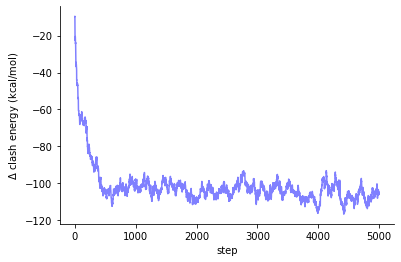

In [3]:

fig, ax = plt.subplots()
ax.plot(np.cumsum(dE))
ax.set_xlabel('step')
ax.set_ylabel(r'$\rm\Delta$ clash energy (kcal/mol)')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

fig.savefig('trajectoty.png', bbox_inches='tight', dpi=1000)

In [4]:
L135R1_repack = xl.SpinLabel.from_trajectory(traj, 135, burn_in=1000)
K277R1_repack = xl.SpinLabel.from_trajectory(traj, 277, burn_in=1000)
resis = [res.resnum for res in omp.select_atoms('around 14 resnum 135').residues] + [res.resnum for res in omp.select_atoms('around 14 resnum 277').residues]

neighbors = [xl.RotamerLibrary.from_trajectory(traj, resi, burn_in=1000) for resi in resis]
neighbors = [resi for resi in neighbors if len(resi) > 1]

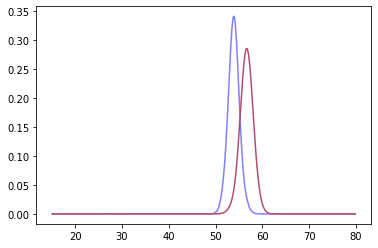

In [6]:
r = np.linspace(15, 80, 256)
P = xl.get_dd(L135R1, K277R1, r)
P_repack = xl.get_dd(L135R1_repack, K277R1_repack, r)

fig, ax = plt.subplots()
ax.plot(r, P)
ax.plot(r, P_repack)
plt.show()

In [27]:
xl.save('L135R1_K277R1.pdb', L135R1, K277R1, omp, KDE=False)
xl.save('L135R1_K277R1_repack.pdb', L135R1_repack, K277R1_repack, *neighbors, omp, KDE=False)

r = np.linspace(15, 80, 256)
dd = xl.get_dd(L135R1, K277R1, r)
dd_repack  = xl.get_dd(L135R1_repack, K277R1_repack, r)

plt.plot(r, dd)
plt.plot(r, dd_repack)
plt.show()